<a href="https://colab.research.google.com/github/luanvu2307/AI-Hackathon-2020/blob/main/AI_Hackathon_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/hcmcaic/ai4vn-hackathon-2020.git ai4vn

fatal: destination path 'ai4vn' already exists and is not an empty directory.


In [ ]:
% cd ai4vn

/content/ai4vn


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from dataloader import image_dataset_from_directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/ai4vn_2020/shizuka_latest_ver.zip'

In [ ]:
path = '/content/ai4vn/sample_data/'
for i in range(0,8):
  print(len(os.listdir(path+str(i))))

2477
508
1242
1006
1154
982
932
907


In [ ]:

path_to_data = '/content/ai4vn/sample_data'


BATCH_SIZE = 10
IMG_SIZE = (299, 299)

NUM_CLASS = 8

train_dataset, train_dataset_filenames = image_dataset_from_directory(path_to_data,
                                             validation_split=0.01,
                                             subset="training",
                                             shuffle=True,
                                             seed=505,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 7629 files belonging to 8 classes.
Using 7553 files for training.


In [ ]:
validation_dataset, validation_dataset_filenames = image_dataset_from_directory(path_to_data,
                                                  validation_split=0.01,
                                                  subset="validation",
                                                  shuffle=True,
                                                  seed=505,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 7629 files belonging to 8 classes.
Using 76 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import os
import zipfile
from PIL import Image
import glob
from pickle import dump, load
import pickle
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
                    
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from keras.applications.resnet50 import ResNet50

import keras.preprocessing.image

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [ ]:
image_size = 299
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = InceptionV3(input_shape=input_shape, include_top=False, weights="imagenet")
    

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = pre_trained_model(image_batch)
print(feature_batch.shape)

In [ ]:
pre_trained_model.trainable = False

In [ ]:
pre_trained_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
prediction_layer = tf.keras.layers.Dense(NUM_CLASS)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(10, 8)


In [ ]:
inputs = tf.keras.Input(shape=(299, 299, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = pre_trained_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 299, 299, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)             

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

8/8 [==============================] - 1s 104ms/step - loss: 2.4812 - accuracy: 0.1053


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.48
initial accuracy: 0.11


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
756/756 [==============================] - 52s 69ms/step - loss: 1.4473 - accuracy: 0.5303 - val_loss: 1.1439 - val_accuracy: 0.5789
Epoch 2/10
756/756 [==============================] - 53s 70ms/step - loss: 0.8942 - accuracy: 0.7344 - val_loss: 0.8532 - val_accuracy: 0.7368
Epoch 3/10
756/756 [==============================] - 52s 69ms/step - loss: 0.7309 - accuracy: 0.7759 - val_loss: 0.7320 - val_accuracy: 0.8289
Epoch 4/10
756/756 [==============================] - 53s 70ms/step - loss: 0.6464 - accuracy: 0.7961 - val_loss: 0.6526 - val_accuracy: 0.8158
Epoch 5/10
756/756 [==============================] - 53s 70ms/step - loss: 0.5998 - accuracy: 0.8132 - val_loss: 0.6077 - val_accuracy: 0.8289
Epoch 6/10
756/756 [==============================] - 52s 69ms/step - loss: 0.5588 - accuracy: 0.8239 - val_loss: 0.5871 - val_accuracy: 0.8289
Epoch 7/10
756/756 [==============================] - 52s 69ms/step - loss: 0.5390 - accuracy: 0.8289 - val_loss: 0.5620 - val_accuracy:

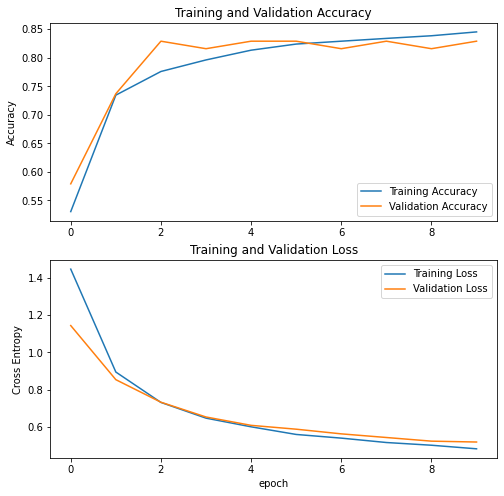

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
pre_trained_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(pre_trained_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in pre_trained_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  311


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])
model.summary()



Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 299, 299, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 299, 299, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)             

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
756/756 [==============================] - 91s 120ms/step - loss: 0.3821 - accuracy: 0.8774 - val_loss: 0.3499 - val_accuracy: 0.8816
Epoch 11/20
756/756 [==============================] - 90s 119ms/step - loss: 0.2617 - accuracy: 0.9129 - val_loss: 0.2141 - val_accuracy: 0.9474
Epoch 12/20
756/756 [==============================] - 90s 119ms/step - loss: 0.2020 - accuracy: 0.9354 - val_loss: 0.2050 - val_accuracy: 0.9342
Epoch 13/20
756/756 [==============================] - 90s 119ms/step - loss: 0.1649 - accuracy: 0.9492 - val_loss: 0.2411 - val_accuracy: 0.9342
Epoch 14/20
756/756 [==============================] - 90s 119ms/step - loss: 0.1284 - accuracy: 0.9613 - val_loss: 0.2624 - val_accuracy: 0.9474
Epoch 15/20
756/756 [==============================] - 90s 119ms/step - loss: 0.1177 - accuracy: 0.9641 - val_loss: 0.3037 - val_accuracy: 0.9342
Epoch 16/20
756/756 [==============================] - 90s 119ms/step - loss: 0.1009 - accuracy: 0.9673 - val_loss: 0.3038 -

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/ai4vn_2020/test_set_A_full.zip","r") as zip_ref:
    zip_ref.extractall("/content/")

In [ ]:
#model.save('/content/drive/MyDrive/ai4vn_2020/model/final_model.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/ai4vn_2020/model/final_model.h5')

In [ ]:
%cd ai4vn

/content/ai4vn


[[  1.2740827   1.5902282  -5.138847   -3.351752  -12.00846   -16.809809
   -8.398843  -10.704462 ]]


[[-0.794524  -7.58137   -4.3752637 -2.2174711 -9.550529  -8.693624
  -8.5931225 -5.628068 ]]


[[ -7.9242554 -12.906538  -10.466143   -8.696976  -14.465749    7.3246064
  -10.131961  -10.509914 ]]


[[ -3.226203   -7.012308   -3.9354098  -4.0407996 -10.031274   -9.017194
   -9.615442   -6.792139 ]]


[[  9.659956  -13.993626   -2.5724163  -7.190781  -13.757456  -15.668351
  -10.676138   -5.39824  ]]


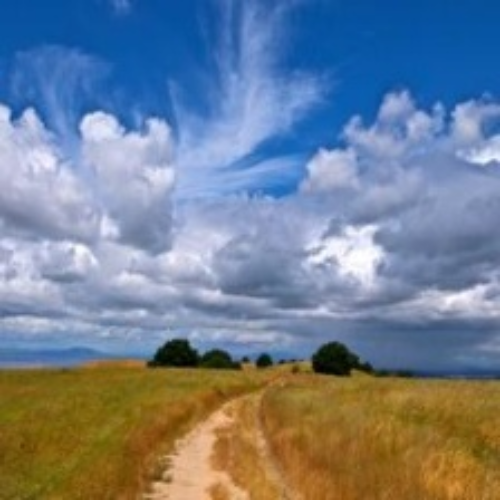

[[  9.330018  -15.272447   -5.9690948  -4.399706  -11.7070055 -13.468088
  -12.744038   -7.2856584]]


[[  0.726694 -10.804227 -13.395186  -8.935791 -15.344842 -16.755789
   -8.616719  -3.3407  ]]


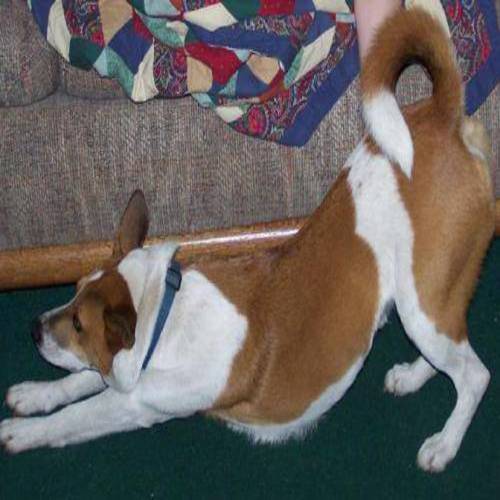

[[  7.9725223  -18.197273     0.08612692  -9.094611   -11.335009
  -11.616132   -10.576799    -8.735174  ]]


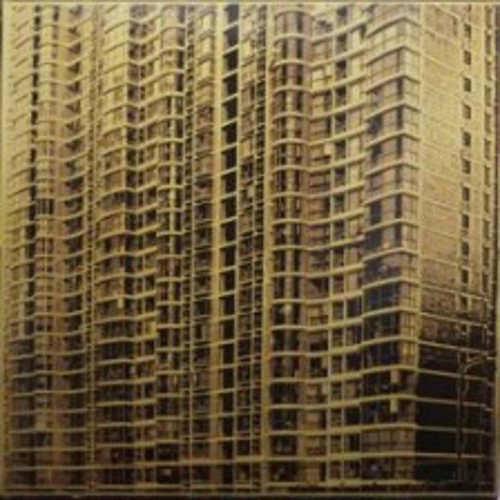

[[  5.5438533 -12.226333  -10.89456    -4.4790144  -9.568989  -14.344623
   -7.788471   -5.323017 ]]


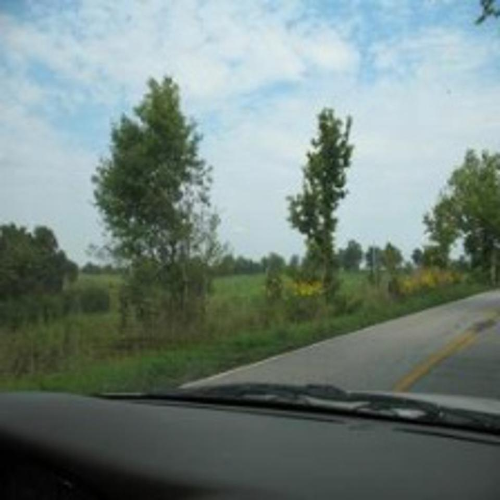

[[ -4.1513124 -10.34064    -6.750703   -9.409617  -16.458897  -12.606595
  -17.13737    -6.4585023]]


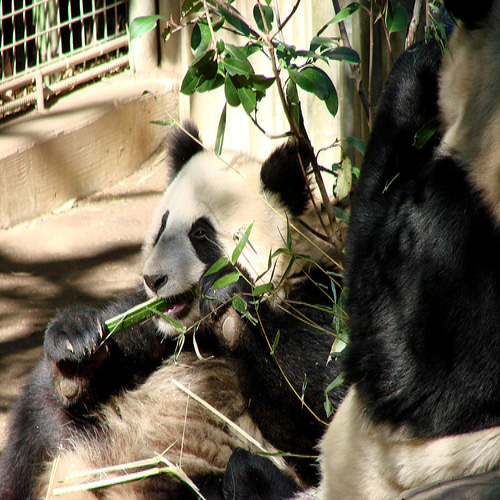

In [ ]:
from dataloader import path_to_image
from google.colab.patches import cv2_imshow
import cv2
path = '/content/test_set_A_full/'
test_dataset = []
final_predictions = []
final_path = []
count = 0
for i in os.listdir(path)[:10]:
  
 
  img = path_to_image(path+i,(299,299),3,'bilinear')
  new_img = np.expand_dims(img,0)
  prediction = model.predict(new_img)
  print(prediction)
  image = cv2.imread(path+i)
  image = cv2.resize(image,(500,500))
  cv2_imshow(image)
  #pre = np.argmax(prediction, axis=-1)
  #final_predictions.append(pre)
  final_path.append(path+i)
  #if count%500 == 0:
   # print(count)
  #count+=1

In [ ]:
final_predictions[:5]

[array([0]), array([0]), array([5]), array([0]), array([0])]

In [ ]:
final_path[:5]

['/content/test_set_A_full/Img14057.jpg',
 '/content/test_set_A_full/Img13278.jpg',
 '/content/test_set_A_full/Img02898.jpg',
 '/content/test_set_A_full/Img18973.jpg',
 '/content/test_set_A_full/Img05974.jpg']

In [ ]:
with open('submission.txt', 'w') as submission_file:
  for filename, predicted in zip(final_path, final_predictions):
    submission_file.write('{}\t{}\n'.format(filename.split('/')[-1], predicted[0]))

In [ ]:
from google.colab import files
files.download('submission.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('/content/drive/MyDrive/Train Dataset AI4VN 2020/model_inception/model_inception_basline_85.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/Train Dataset AI4VN 2020/model_inception/model_inception_baseline_85.h5')